In [1]:
from dolfin import *
# import pygmsh_mesh_functions
# from pygmsh_mesh_functions import *
import meshio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import hsv_to_rgb
from tqdm import tqdm


In [2]:
# list available samples
from os import listdir
meshpath = './output_files/'
mesh_list = [x for x in listdir(meshpath) if x.endswith('.xdmf')]
mesh_list

['GWO119_Bezier_2fold.xdmf',
 'GWO120_Bezier_3fold.xdmf',
 'GWO121_freeHH_withholewall.xdmf',
 'GWO122_freeHH_withholewall.xdmf',
 'GWO126_Bezier_2fold.xdmf',
 'GWO127_Bezier_3fold.xdmf',
 'GWO128_freeHH_withholewall.xdmf']

1799 elements in mesh


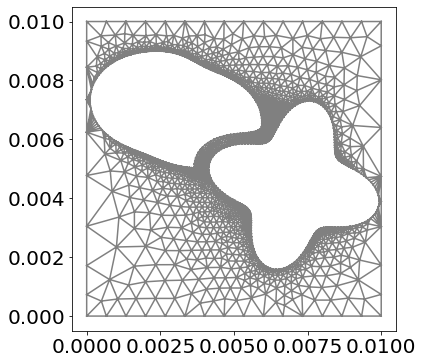

In [3]:
meshfile = 'GWO128_freeHH_withholewall.xdmf'                    # with .xdmf
meshpath = './output_files/'
sample_height=1     #IMPORTANT TO CHECK       #height of the sample in the mesh file (m)
Lx=0.01
Ly=0.01

mesh = Mesh()
with XDMFFile(meshpath+meshfile) as xdmf_infile:
    xdmf_infile.read(mesh)
n_elements = mesh.coordinates().shape[0]
print(str(n_elements)+" elements in mesh")

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plot(mesh)
# ax.set_xlabel('$(\epsilon_x - \epsilon_y)/2$',fontsize=24)
# ax.set_ylabel('$\epsilon_{xy}$',fontsize=24)
ax.tick_params(which='both', labelsize=20)
ax.set_position([0.2, 0.15, 0.75, 0.75])
# plt.savefig('example_mesh.png', dpi=96)

1799 elements in mesh


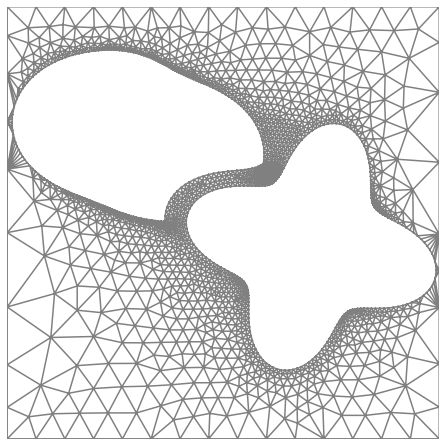

In [4]:
sample_height=1     #IMPORTANT TO CHECK       #height of the sample in the mesh file (m)

mesh = Mesh()
with XDMFFile(meshpath+meshfile) as xdmf_infile:
    xdmf_infile.read(mesh)
n_elements = mesh.coordinates().shape[0]
print(str(n_elements)+" elements in mesh")

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plot(mesh)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_position([0, 0, 1, 1])
plt.savefig('example_mesh_borderless.png', dpi=96)

In [5]:
# load data
datapath = './resultstester/'
mesh = meshio.read(datapath + meshfile +' - stess000001.vtu')
m_point = mesh.points
m_cell = mesh.cells[0].data
m_value = mesh.point_data

In [6]:
# Compute polar coordinate in stress space
sigma_xx = m_value['$\\sigma$'][:,0]
sigma_yy = m_value['$\\sigma$'][:,4]
sigma_xy = m_value['$\\sigma$'][:,1]

coord       = [(sigma_xx-sigma_yy)/2,sigma_xy]
r           = np.sqrt(coord[0]**2+coord[1]**2)
phi         = np.arctan2(sigma_xy,(sigma_xx-sigma_yy)/2)
phi[phi<=0]+=2*np.pi
# coord_polar = np.array([r,phi]).T

color_hsv = np.array([phi/(np.pi*2),np.ones_like(phi),np.ones_like(phi)]).T
color_rgb = hsv_to_rgb(color_hsv)

r_norm = r/np.max(r)

phi_cell = np.array([phi[x] for x in m_cell[:,0]])
r_cell = np.array([r_norm[x] for x in m_cell[:,0]])

In [7]:
phi_cell

array([2.95110897, 3.41540887, 3.4373304 , ..., 3.984646  , 4.100999  ,
       3.13341172])

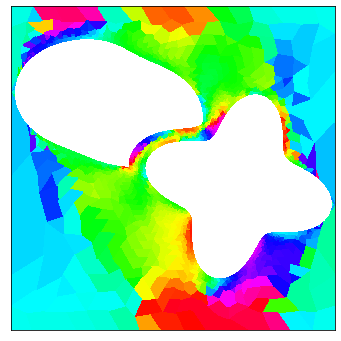

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

tpc = ax.tripcolor(m_point[:,0], m_point[:,1], m_cell, phi_cell, vmin=0, vmax=2*np.pi,
                   shading='flat', cmap='hsv')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.tick_params(which='both', labelsize=20)
ax.set_position([0.2, 0.15, 0.75, 0.75])
pngname = datapath+meshfile+'phi.png'
plt.savefig(pngname, dpi=96)

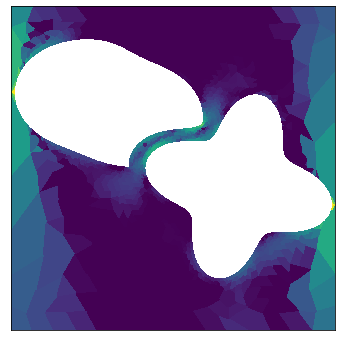

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

# tpc = ax.tripcolor(m_point[:,0], m_point[:,1], m_cell, r_cell, vmin=0, vmax=1,
#                    shading='flat', cmap='viridis')
tpc = ax.tripcolor(m_point[:,0], m_point[:,1], m_cell, np.log10(r_cell), vmin=-2, vmax=0,
                   shading='flat', cmap='viridis')
#                    shading='flat', cmap='bwr')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.tick_params(which='both', labelsize=20)
ax.set_position([0.2, 0.15, 0.75, 0.75])
pngname = datapath+meshfile+'r.png'
# pngname = datapath+'r_bwr.png'
plt.savefig(pngname, dpi=96)

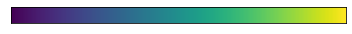

In [10]:
fig = plt.figure(figsize=(6, 0.3))
ax = plt.subplot(1, 1, 1)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(gradient, aspect='auto', cmap='viridis')
plt.show()

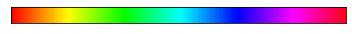

In [11]:
fig = plt.figure(figsize=(6, 0.3))
ax = plt.subplot(1, 1, 1)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(gradient, aspect='auto', cmap='hsv')
plt.show()

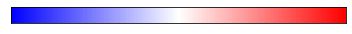

In [12]:
fig = plt.figure(figsize=(6, 0.3))
ax = plt.subplot(1, 1, 1)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(gradient, aspect='auto', cmap='bwr')
plt.show()

## Grid interpolated data

from scipy import interpolate
lx=Lx
ly=Ly
mesh = Mesh()
with XDMFFile(meshpath+meshfile) as xdmf_infile:
    xdmf_infile.read(mesh)
    
mesh_coord = mesh.coordinates()
mesh_cell = mesh.cells()

sigma_xx = m_value['$\\sigma$'][:,0]
sigma_yy = m_value['$\\sigma$'][:,4]
sigma_xy = m_value['$\\sigma$'][:,1]
sigma = np.array([[[sigma_xx[i],sigma_xy[i]],[sigma_xy[i],sigma_yy[i]]] for i in range(len(sigma_xx))])

sigma_test = sigma

# meshgrid
n_x = 50
n_y = 50
xc = np.arange(n_x+1)/n_x*lx
yc = np.arange(n_y+1)/n_y*ly
xx, yy = np.meshgrid(xc,yc)
N_xy = np.zeros_like(xx,dtype=bool)

# remove data from hole
x_grid = xx.reshape((n_x+1)*(n_y+1))
x_grid = yy.reshape((n_x+1)*(n_y+1))
for i in range(n_x+1):
    for j in range(n_y+1):
        contains = [cell.contains(Point(xc[i],yc[j])) for cell in cells(mesh)]
        N_xy[i,j] = any(contains)

list_matrix_index = [[0,0],[0,1],[1,0],[1,1]]

# interpolation
sigma_interp = np.zeros((n_x+1,n_y+1,2,2))
for i, matrix_index in enumerate(list_matrix_index):
#     f = interpolate.interp2d(mesh_coord[:,0],mesh_coord[:,1],sigma_test[:,matrix_index[0],matrix_index[1]])
#     sigma_interp[:,:,matrix_index[0],matrix_index[1]] = f(xc, yc)
    sigma_interp[:,:,matrix_index[0],matrix_index[1]] = interpolate.griddata(mesh_coord,sigma_test[:,matrix_index[0],matrix_index[1]],(xx, yy),
                                                                             method='linear')
    
sigma_interp_inside = sigma_interp[N_xy.T,:,:]
n_element_inside = len(sigma_interp_inside)

phi_test = np.arctan2(sigma_test[:,0,1], (sigma_test[:,0,0] - sigma_test[:,1,1])/2)
phi_test[phi_test<0]+=2*np.pi

phi_interp = np.arctan2(sigma_interp[:,:,0,1], (sigma_interp[:,:,0,0] - sigma_interp[:,:,1,1])/2)
phi_interp[phi_interp<0]+=2*np.pi

r_test = np.sqrt(((sigma_test[:,0,0] - sigma_test[:,1,1])/2)**2+(sigma_test[:,0,1])**2)
r_test_norm = r_test/np.nanmax(r_test)

r_interp = np.sqrt(((sigma_interp[:,:,0,0] - sigma_interp[:,:,1,1])/2)**2+(sigma_interp[:,:,0,1])**2)
r_interp_norm = r_interp/np.nanmax(r_interp)

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
ax.pcolor(xx,yy,phi_interp,
           vmin=0, vmax=np.pi*2,
           edgecolor='black',cmap='hsv')

from matplotlib.colors import LinearSegmentedColormap
colors_alpha = [(0,0,0,1), (0,0,0,0)]
cm = LinearSegmentedColormap.from_list('custom', colors_alpha, N=2, gamma=0)
ax.pcolor(xx,yy,N_xy.T,
           vmin=0, vmax=1, cmap=cm)


ax.triplot(mesh_coord[:,0], mesh_coord[:,1], mesh_cell,'-k',lw=0.5, zorder=2,marker=None)
ax.scatter(mesh_coord[:,0],mesh_coord[:,1],20,phi_test,'o',
            vmin=0, vmax=np.pi*2,edgecolors= "black",cmap='hsv', zorder=1)
# plt.scatter(mesh_coord[:,0],mesh_coord[:,1],10,sigma_test[:,0,0]**2+sigma_test[:,1,1]**2)
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.set_xticks([])
ax.set_yticks([])

pngname = datapath+'phi_grid.png'
plt.savefig(pngname, dpi=96)

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plt.pcolor(xx,yy,r_interp_norm,
           vmin=0, vmax=1,
           edgecolor='black',cmap='viridis')

from matplotlib.colors import LinearSegmentedColormap
colors_alpha = [(0,0,0,1), (0,0,0,0)]
cm = LinearSegmentedColormap.from_list('custom', colors_alpha, N=2, gamma=0)
plt.pcolor(xx,yy,N_xy.T,
           vmin=0, vmax=1, cmap=cm)

plt.scatter(mesh_coord[:,0]+1/100*Lx,mesh_coord[:,1]+1/100*Ly,20,r_test_norm,'o',
            vmin=0, vmax=1, edgecolors= "black",cmap='viridis')
plt.scatter(mesh_coord[:,0],mesh_coord[:,1],10,sigma_test[:,0,0]**2+sigma_test[:,1,1]**2)
ax.set_xlim([0,Lx])
ax.set_ylim([0,Ly])
ax.set_xticks([])
ax.set_yticks([])

pngname = datapath+'r_grid.png'
plt.savefig(pngname, dpi=96)

In [13]:
# def arrange_array(n_holes_x, n_holes_y, 
#                   size = 3, scale = 1, 
#                   freq = 1, phase = 0, shift = np.array([0,0])):
    
#     min_n_holes = np.min((n_holes_x,n_holes_y))
#     l = scale/min_n_holes

#     xx = scale*(np.arange(n_holes_x)-n_holes_x/2+0.5)/size+0.5
#     yy = scale*(np.arange(n_holes_y)-n_holes_y/2+0.5)/size+0.5
#     cx,cy = np.meshgrid(xx,yy)
#     cx = cx.reshape(n_holes_x*n_holes_y)
#     cy = cy.reshape(n_holes_x*n_holes_y)
#     c = np.vstack((cx,cy)) # hole coordinate

#     s_xx = (-1)**np.arange(n_holes_x)
#     s_yy = (-1)**np.arange(n_holes_y)
#     sgn_x,sgn_y = np.meshgrid(s_xx,s_yy)
#     sgn = sgn_x*sgn_y
#     sgn = sgn.reshape(n_holes_x*n_holes_y)
#     theta = np.pi*(sgn/2)*freq + phase # hole orientation
#     theta = theta + (np.random.rand(len(theta))-0.5)*0 + np.pi
    
#     return(c, theta, size)

# def arch(c, theta, size):
    
#     co, so = np.cos(theta), np.sin(theta)
#     Rotation = np.array(((co, -so), (so, co)))
    
#     n_phi = 15
#     phi = np.arange(n_phi+1)/n_phi*np.pi/2-np.pi/4
#     arch_r = (Rotation@np.array([np.cos(phi)/size/np.sqrt(2),
#                                  np.sin(phi)/size/np.sqrt(2)])).T+c
#     arch_l = -(Rotation@np.array([np.cos(phi)/size/np.sqrt(2),
#                                   np.sin(phi)/size/np.sqrt(2)])).T+c
#     arch_u = (Rotation@np.array([np.cos(phi+np.pi/2)/size/np.sqrt(2),
#                                  (np.sqrt(2)-np.sin(phi+np.pi/2))/size/np.sqrt(2)])).T+c
#     arch_d = -(Rotation@np.array([np.cos(phi+np.pi/2)/size/np.sqrt(2),
#                                   (np.sqrt(2)-np.sin(phi+np.pi/2))/size/np.sqrt(2)])).T+c
    
#     arch_all = np.vstack((arch_r,arch_u,arch_l,arch_d))
    
#     return arch_all

# # arrange the tools
# c_node, theta_node, size_node = arrange_array(4, 4, size = 4, scale = 1, freq = 0.5, phase = np.pi/4)
# c, theta, size = arrange_array(5, 3, size = 4, scale = 1, freq = 0.5, phase = np.pi/4)

# fig = plt.figure(figsize=(6, 6))
# ax = plt.subplot(1, 1, 1)

# tpc = ax.tripcolor(m_point[:,0], m_point[:,1], m_cell, r_cell, vmin=0, vmax=1,
#                    shading='flat', cmap='viridis')

# for i in range(len(theta_node)):
#     ax.plot(c_node[0,i],c_node[1,i],'wo')
    
# for i in range(len(theta)):    
#     archc = arch(c[:,i],theta[i],4)
#     ax.plot(archc[:,0],archc[:,1],'w.', markersize=2)

# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])
# ax.tick_params(which='both', labelsize=20)
# ax.set_position([0.2, 0.15, 0.75, 0.75])

# pngname = datapath+'r_network.png'
# # plt.savefig(pngname, dpi=96)